In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv


In [2]:
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
file = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
file.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
file.isnull().sum(axis = 0)

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [5]:
file

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


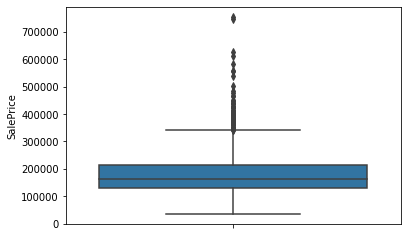

In [6]:
sns.boxplot( y = 'SalePrice',data = file)

In [7]:
d = 0
for i in file.index:
    if file['SalePrice'][i]>450000:
        file = file.drop(i)
        d+=1
print(d)

14


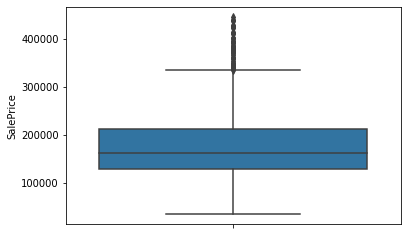

In [8]:
sns.boxplot( y = 'SalePrice',data = file)

In [9]:
file.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [10]:
list_cat = ['MSSubClass','MSZoning','Street','Alley', 'LotShape', 'LandContour','Utilities', 'LotConfig','LandSlope', 'Neighborhood','Condition1', 'Condition2',
     'BldgType','HouseStyle', 'OverallQual','OverallCond','RoofStyle', 'RoofMatl', 'Exterior1st','Exterior2nd', 'MasVnrType','ExterQual',
     'ExterCond', 'Foundation', 'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC', 'CentralAir', 'Electrical',
     'KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond', 'PavedDrive','PoolQC','Fence', 'MiscFeature',
     'SaleType','SaleCondition']
for i in list_cat:
    print(file.groupby(i).mean().index)

Int64Index([20, 30, 40, 45, 50, 60, 70, 75, 80, 85, 90, 120, 160, 180, 190], dtype='int64', name='MSSubClass')
Index(['C (all)', 'FV', 'RH', 'RL', 'RM'], dtype='object', name='MSZoning')
Index(['Grvl', 'Pave'], dtype='object', name='Street')
Index(['Grvl', 'Pave'], dtype='object', name='Alley')
Index(['IR1', 'IR2', 'IR3', 'Reg'], dtype='object', name='LotShape')
Index(['Bnk', 'HLS', 'Low', 'Lvl'], dtype='object', name='LandContour')
Index(['AllPub', 'NoSeWa'], dtype='object', name='Utilities')
Index(['Corner', 'CulDSac', 'FR2', 'FR3', 'Inside'], dtype='object', name='LotConfig')
Index(['Gtl', 'Mod', 'Sev'], dtype='object', name='LandSlope')
Index(['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr',
       'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel',
       'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown', 'SWISU',
       'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber', 'Veenker'],
      dtype='object', name='Neighborhood')
Index(['Arter

In [11]:
dic = {}
for i in list_cat :
    a = []
    for j in file.groupby(i).mean().index:
        a.append(j)
    dic[i] = a
dic['LandContour'] = ['Lvl','Bnk', 'HLS', 'Low']
dic['LotConfig'] = ['Inside','Corner', 'CulDSac', 'FR2', 'FR3']
dic['ExterQual'] = ['Ex', 'Gd', 'TA', 'Fa']
dic['ExterCond'] = ['Ex','Gd', 'TA','Fa','Po']
dic['BsmtQual'] = ['Ex', 'Gd', 'TA', 'Fa']
dic['BsmtCond'] = ['Gd', 'TA', 'Fa','Po']
dic['BsmtExposure'] = ['Gd','Av', 'Mn', 'No']
dic['BsmtFinType1'] = ['GLQ','ALQ', 'BLQ','Rec', 'LwQ', 'Unf']
dic['BsmtFinType2'] = ['GLQ','ALQ', 'BLQ','Rec', 'LwQ', 'Unf']
dic['HeatingQC'] = ['Ex','Gd', 'TA','Fa','Po']
dic['Electrical'] = ['SBrkr','FuseA', 'FuseF', 'FuseP', 'Mix']
dic['KitchenQual'] = ['Ex','Gd', 'TA','Fa']
dic['Functional']=['Typ','Min1', 'Min2', 'Mod','Maj1', 'Maj2', 'Sev']
dic['GarageQual'] =['Ex','Gd', 'TA','Fa','Po']
dic['GarageCond'] =['Ex','Gd', 'TA','Fa','Po']
dic['PoolQC'] = ['Ex','Gd','Fa']
dic['Fence'] = ['GdPrv','MnPrv','GdWo', 'MnWw']
dic['SaleType'] = ['WD','CWD','New','COD', 'Con','ConLw', 'ConLI','ConLD','Oth', ]
dic['SaleCondition'] = ['Normal','Abnorml', 'AdjLand', 'Alloca', 'Family','Partial']

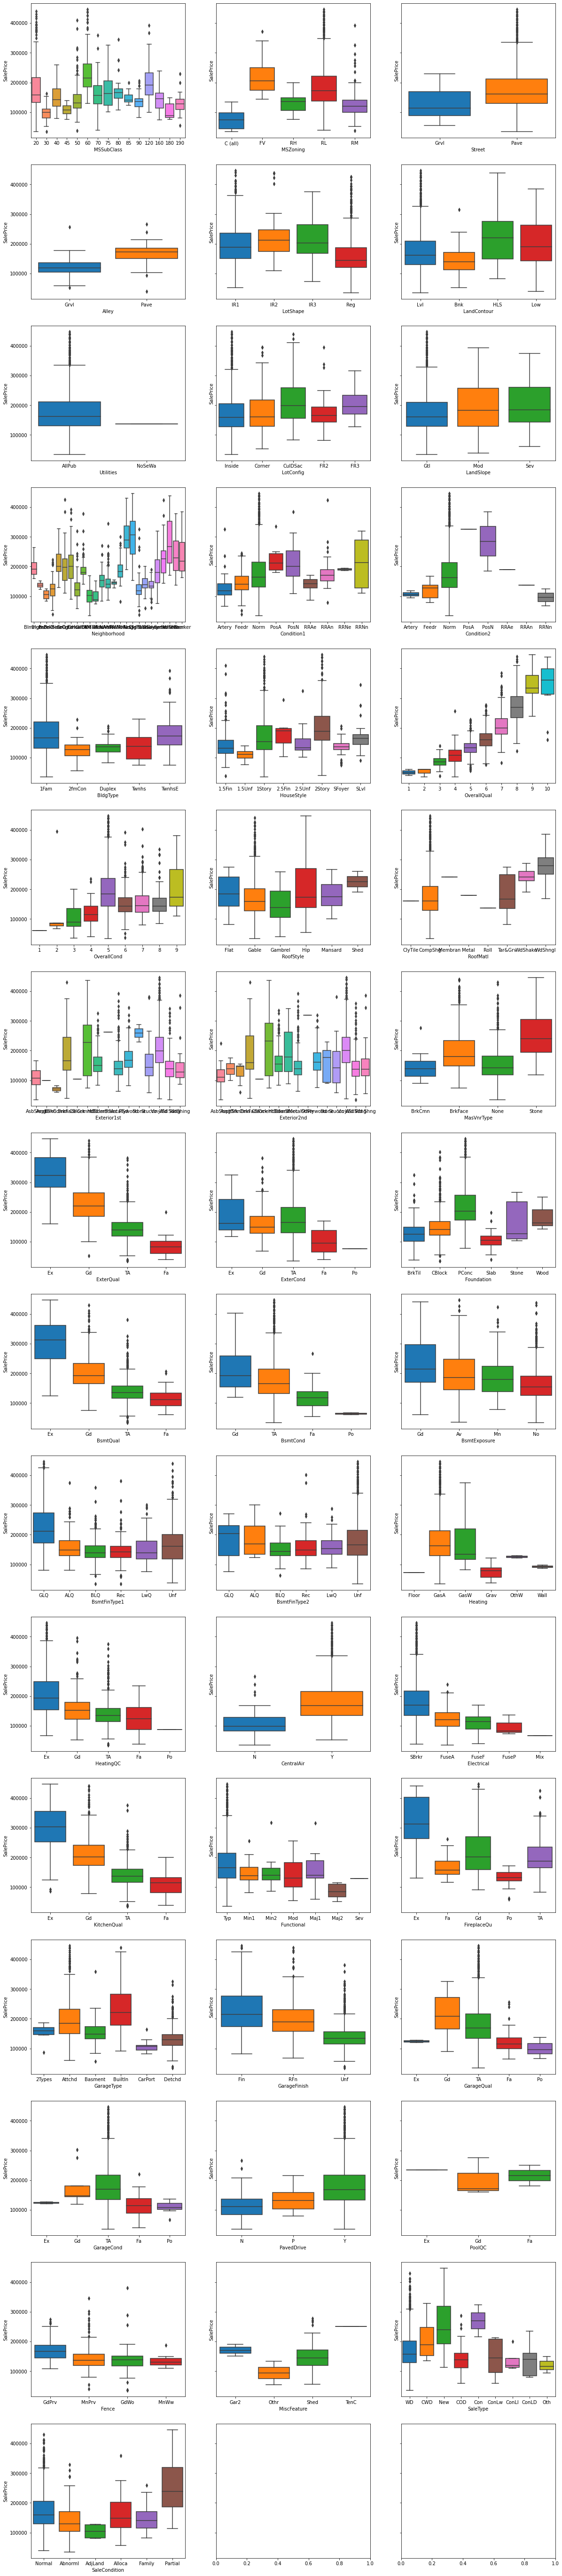

In [12]:
y = 'SalePrice'
n = 3
s=20
f,axes = plt.subplots(5*n+1,n,figsize = (s,5*s),sharey=True)
counter = 0
for i in list_cat:
    sns.boxplot(x = i , y = y , data  = file,order= dic[i], ax = axes[counter//n][counter%n],saturation = 1)
    counter+=1

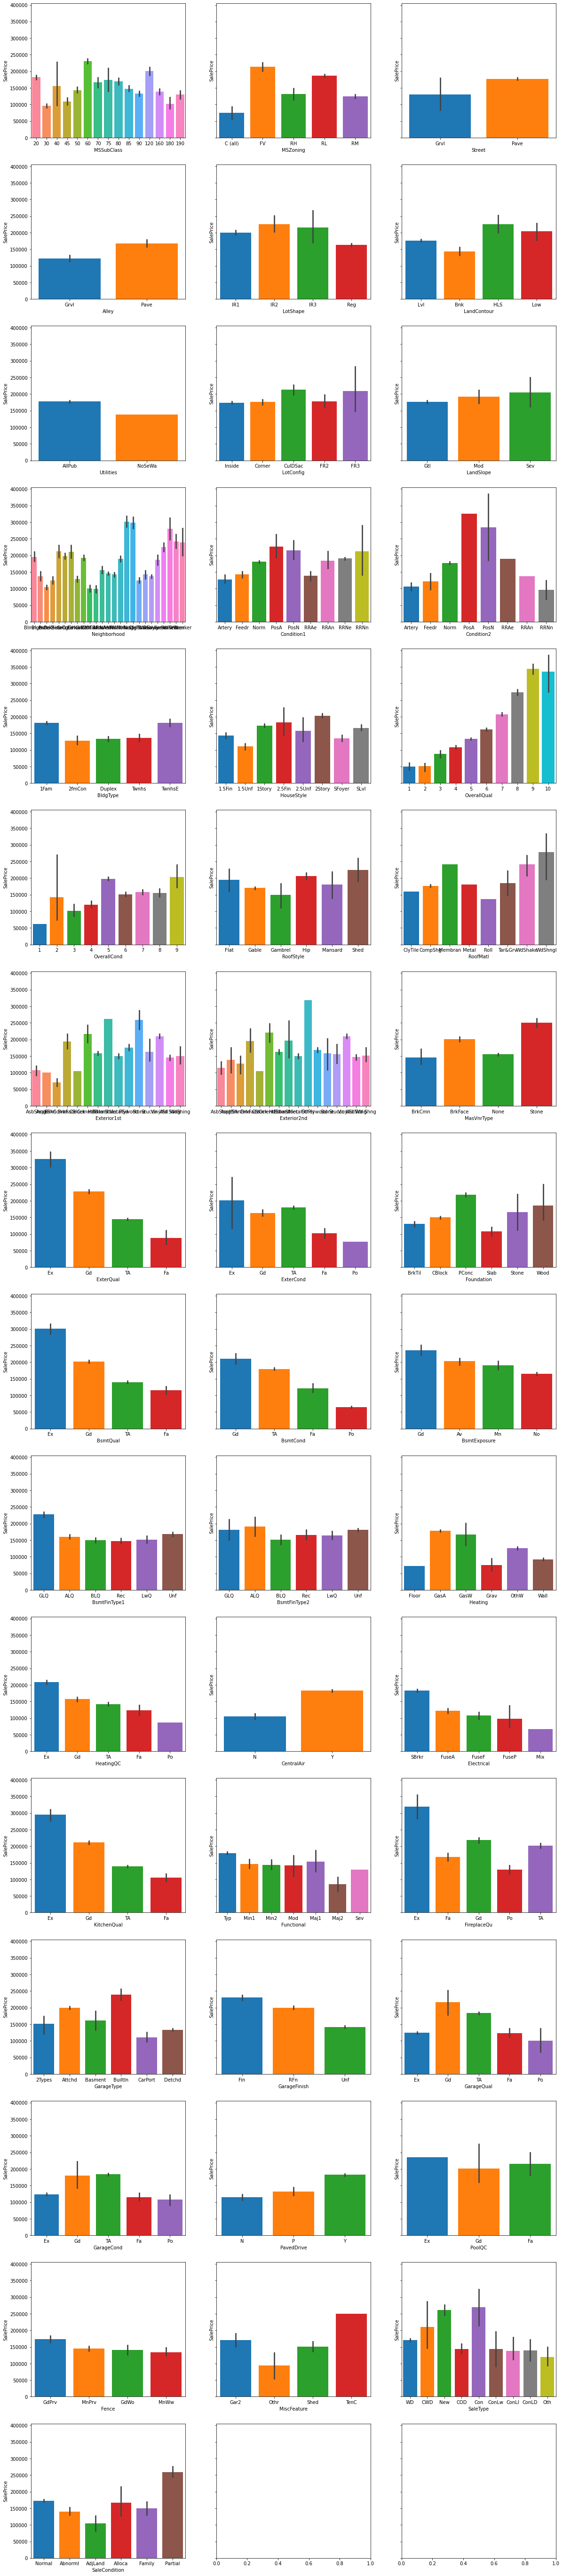

In [13]:
y = 'SalePrice'
n = 3
s= 20
f,axes = plt.subplots(5*n+1,n,figsize = (s,5*s),sharey=True)
counter = 0
for i in list_cat:
    sns.barplot(x = i , y = y , data  = file,order= dic[i], ax = axes[counter//n][counter%n],saturation = 1)
    counter+=1

In [14]:
list_cont = ['MSSubClass','LotFrontage', 'LotArea','OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF',
               '1stFlrSF','BedroomAbvGr', 'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars', 'GarageArea','WoodDeckSF', 'OpenPorchSF',
               'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea','MiscVal', 'MoSold', 'YrSold','LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 
               'BsmtHalfBath', 'FullBath','HalfBath','2ndFlrSF']

In [15]:
len(list_cont)

35

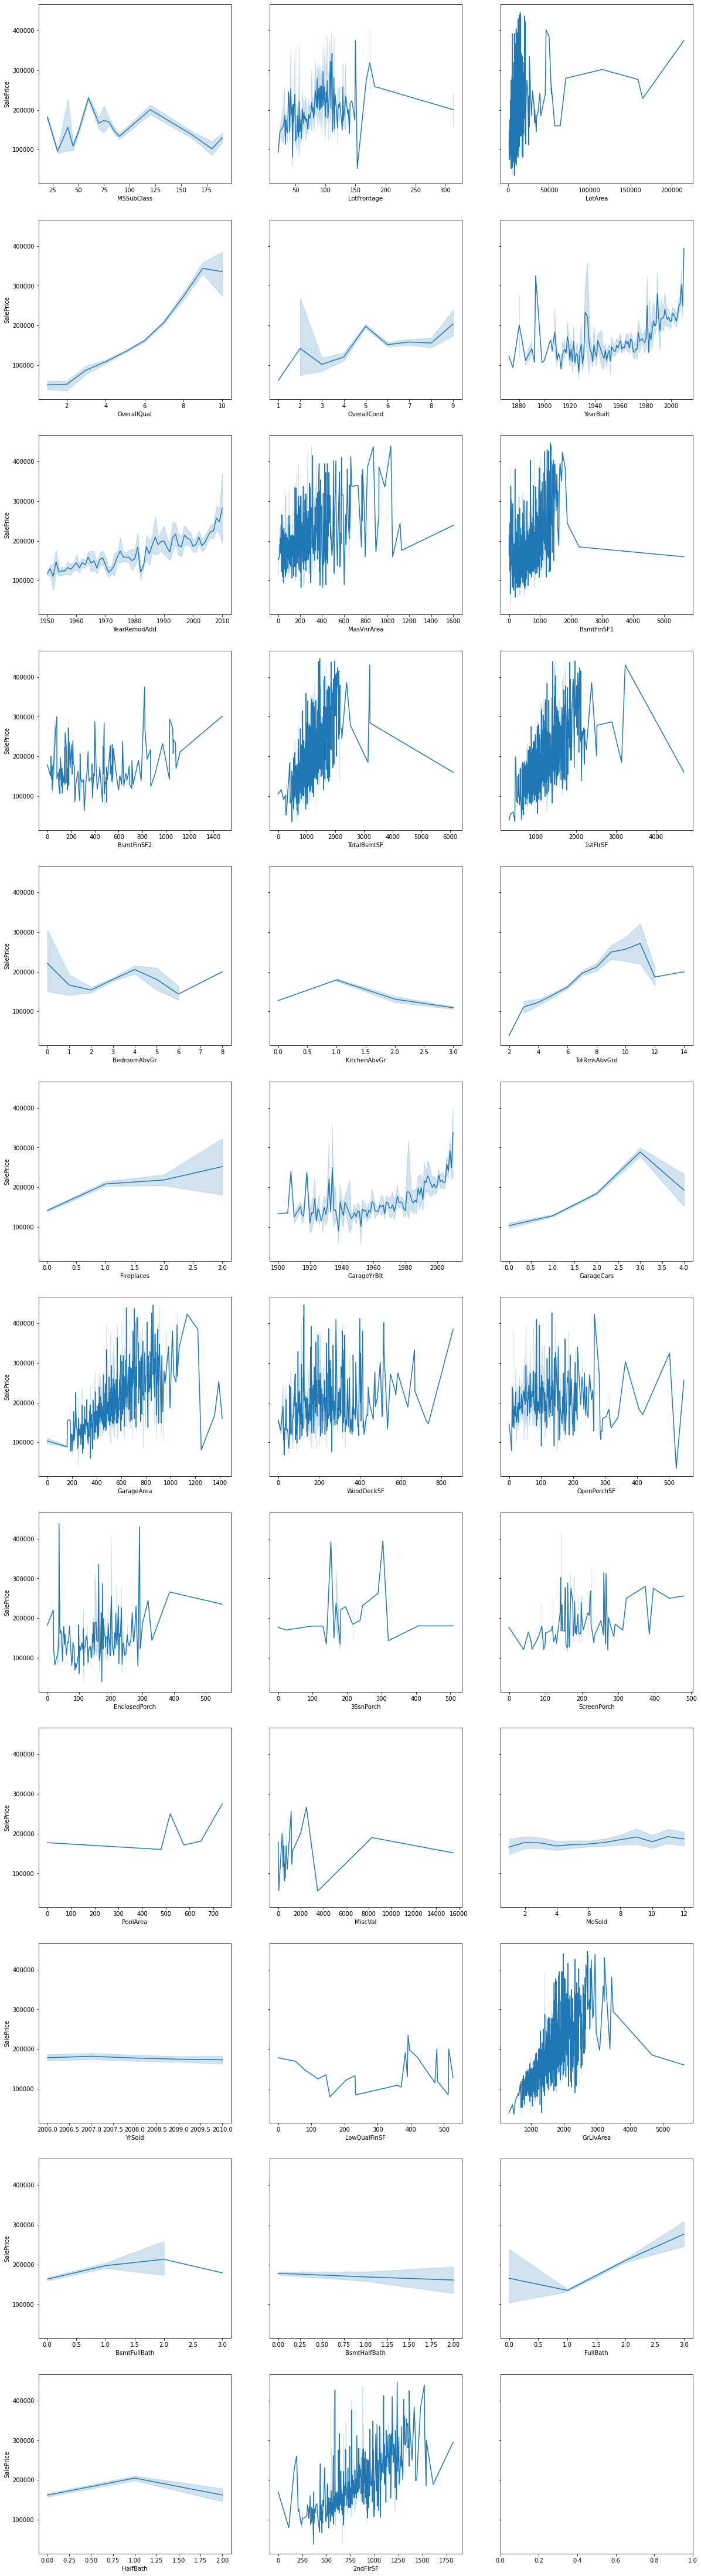

In [16]:
y = 'SalePrice'
n = 3
s= 20
f,axes = plt.subplots(4*n,n,figsize = (s,4*s),sharey=True)
counter = 0
for i in list_cont:
    sns.lineplot(x = i , y = y , data  = file, ax = axes[counter//n][counter%n])
    counter+=1

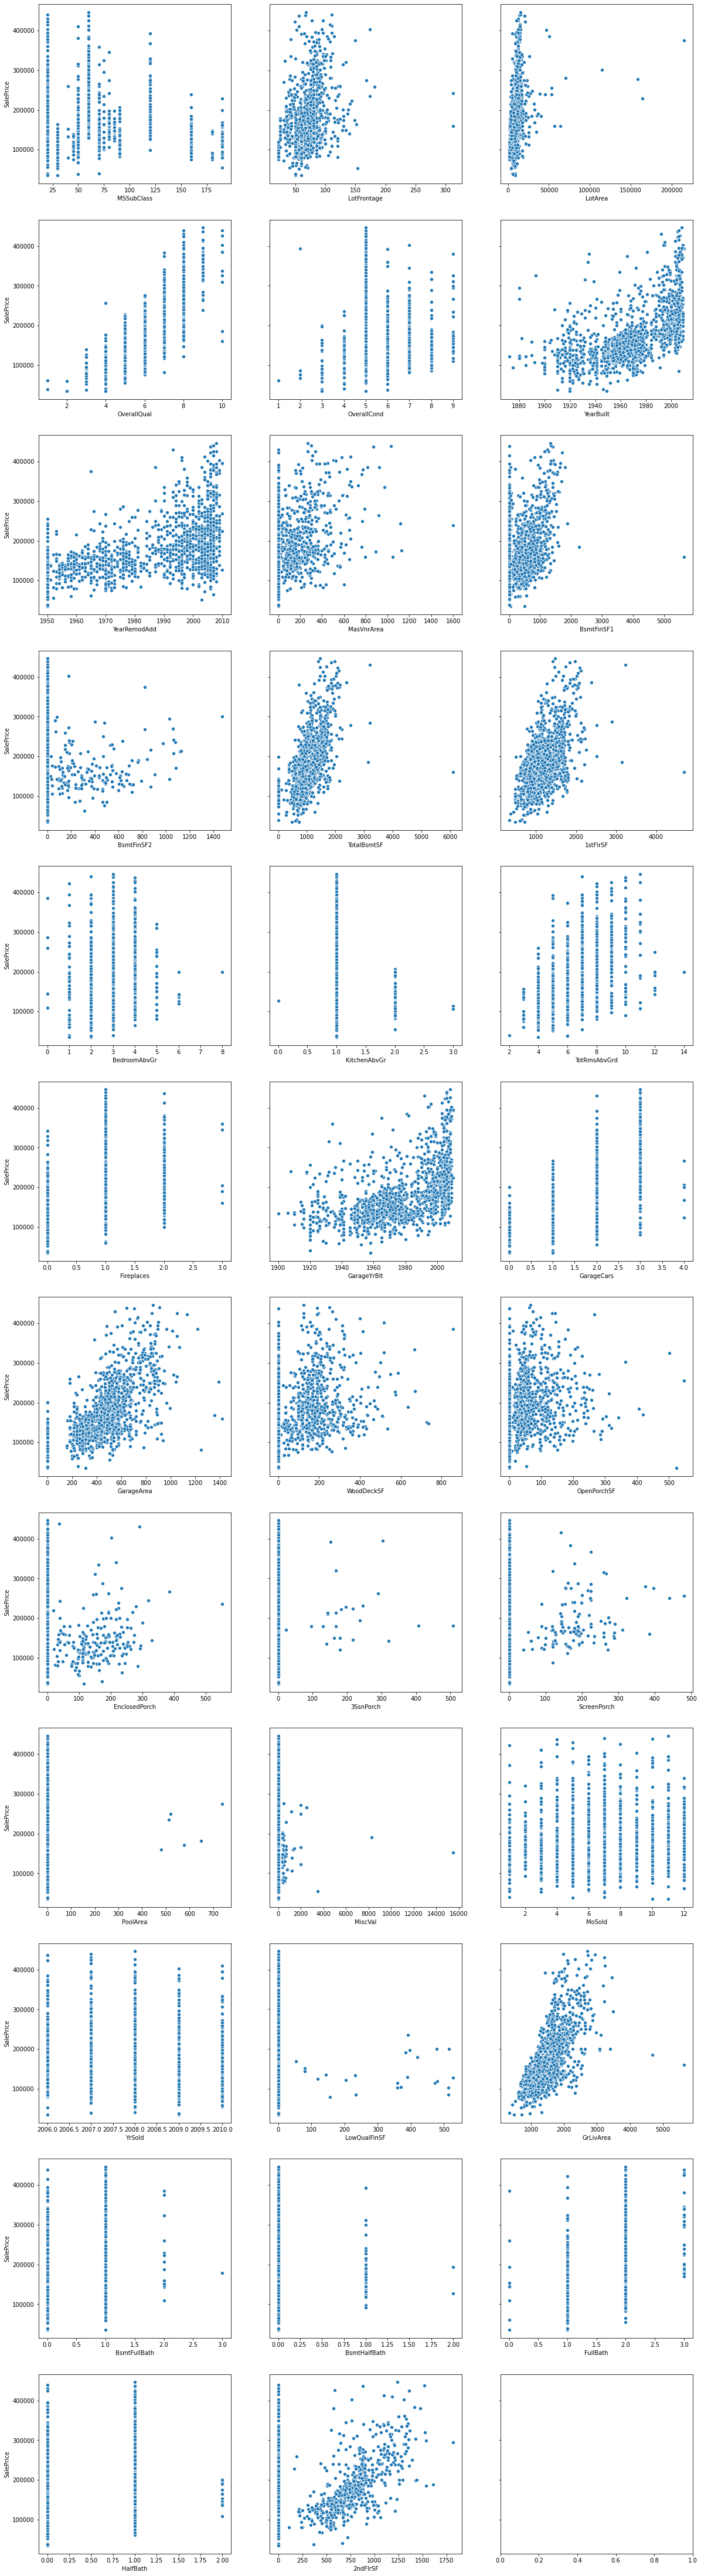

In [17]:
y = 'SalePrice'
n = 3
s= 20
f,axes = plt.subplots(4*n,n,figsize = (s,4*s),sharey=True)
counter = 0
for i in list_cont:
    sns.scatterplot(x = i , y = y , data  = file, ax = axes[counter//n][counter%n])
    counter+=1

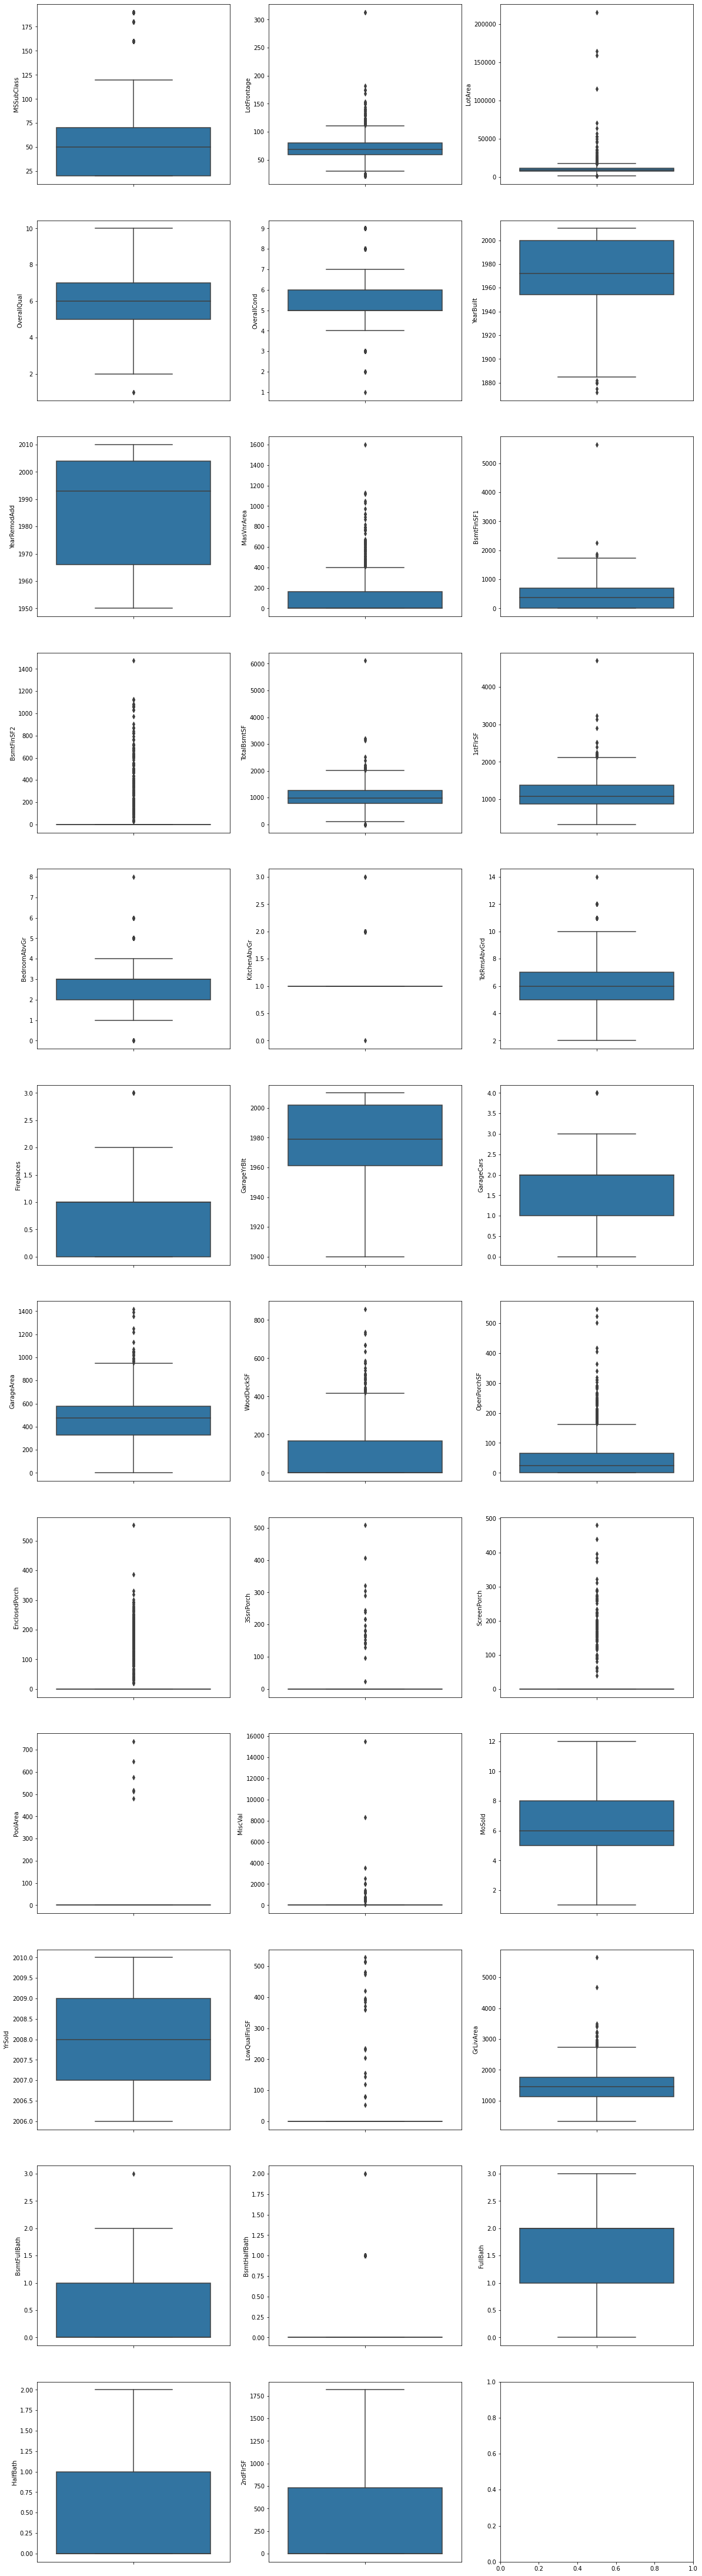

In [18]:
n = 3
s= 20
f,axes = plt.subplots(4*n,n,figsize = (s,4*s))
counter = 0
for i in list_cont:
    sns.boxplot(y = i , data  = file, ax = axes[counter//n][counter%n])
    counter+=1

In [20]:
file.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

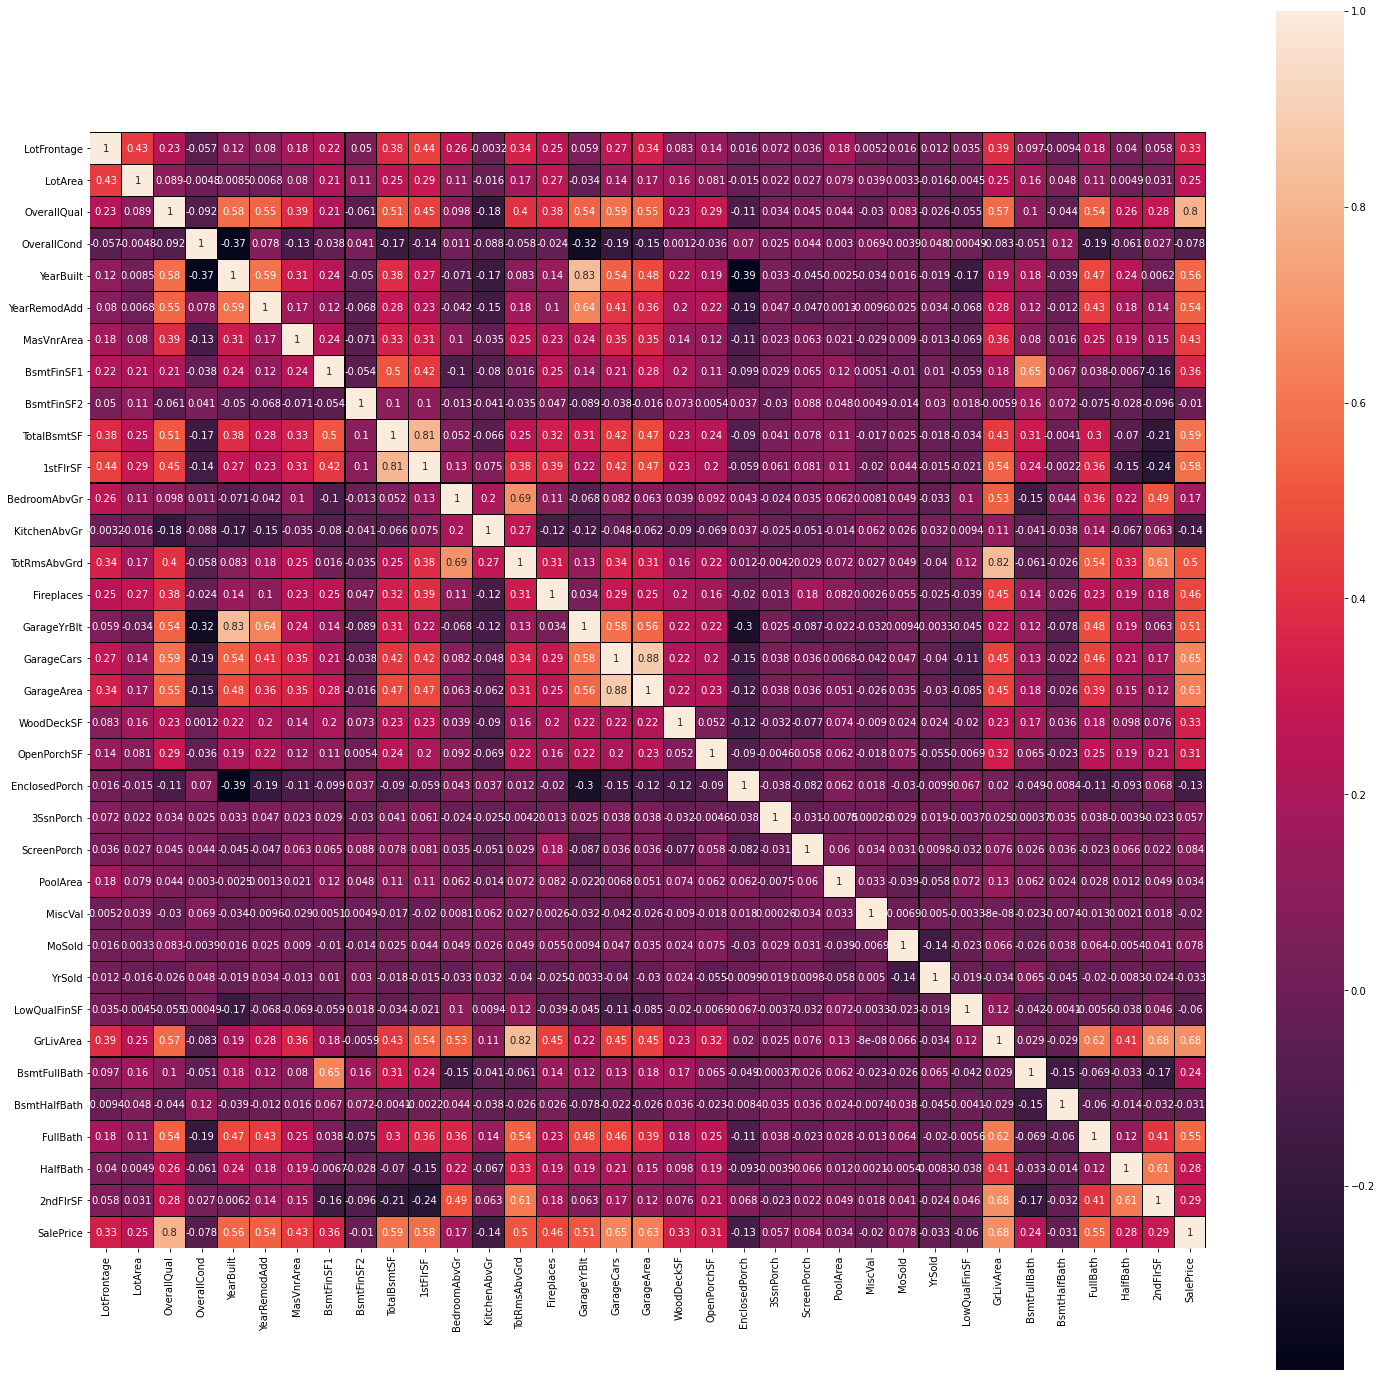

In [22]:

corr  = file[[ 'LotFrontage', 'LotArea','OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF',
               '1stFlrSF','BedroomAbvGr', 'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars', 'GarageArea','WoodDeckSF', 'OpenPorchSF',
               'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea','MiscVal', 'MoSold', 'YrSold','LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 
               'BsmtHalfBath', 'FullBath','HalfBath','2ndFlrSF','SalePrice']].corr()
f,axes = plt.subplots(1,1,figsize = (25,25))
sns.heatmap(corr,square=True,annot = True,linewidth = .1,linecolor = 'black',ax = axes)

In [ ]:
file.columns